# Estudo 01 - Deep Learning

In [43]:
import tensorflow
import matplotlib.pyplot as plt
import numpy as np


In [44]:
from tensorflow import keras
dataset = keras.datasets.fashion_mnist
((imagens_treino, identificacoes_treino), (imagens_teste, identificacoes_teste)) = dataset.load_data()

## Explorando os Dados

In [45]:
imagens_treino.shape

(60000, 28, 28)

In [46]:
imagens_teste.shape

(10000, 28, 28)

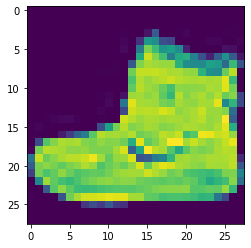

In [47]:
plt.imshow(imagens_treino[0])

Text(0.5, 1.0, '9')

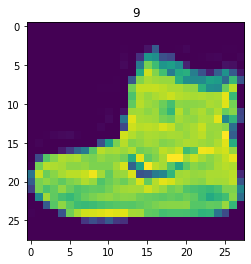

In [48]:
plt.imshow(imagens_treino[0])
plt.title(identificacoes_treino[0])

In [49]:
identificacoes_treino

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [50]:
identificacoes_treino.min()

0

In [51]:
identificacoes_treino.max()

9

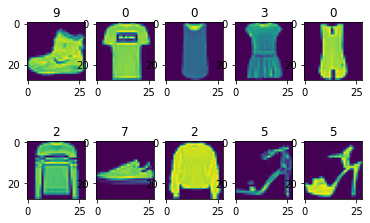

In [52]:
total_de_classificacoes = 10

for imagem in range(10):
  plt.subplot(2,5, imagem+1)
  plt.imshow(imagens_treino[imagem])
  plt.title(identificacoes_treino[imagem])

Cada exemplo de treinamento e teste é atribuído a um dos seguintes rótulos:

| Label	| Description|
| -------------  | --- |
|0|	T-shirt/top|
|1|	Trouser|
|2|	Pullover|
|3|	Dress|
|4|	Coat|
|5|	Sandal|
|6|	Shirt|
|7|	Sneaker|
|8|	Bag|
|9|	Ankle boot|



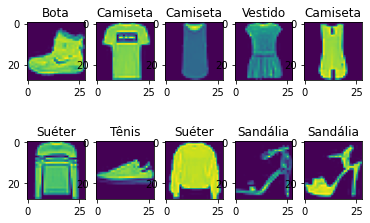

In [53]:
nome_classificacoes = ['Camiseta', 'Calça', 'Suéter',
                       'Vestido', 'Casaco', 'Sandália',
                       'Camisa', 'Tênis', 'Bolsa', 'Bota']

for imagem in range(10):
  plt.subplot(2,5, imagem+1)
  plt.imshow(imagens_treino[imagem])
  plt.title(nome_classificacoes[identificacoes_treino[imagem]])

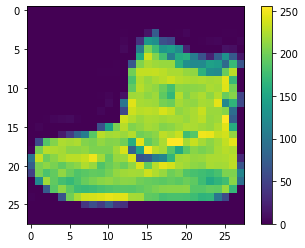

In [54]:
plt.imshow(imagens_treino[0])
plt.colorbar()

## Criando, Copilando e Normalizando o Modelo

In [55]:
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape= (28,28)), 
    keras.layers.Dense(256, activation= 'relu'),
    keras.layers.Dropout(0.2), # 20% das unidades adormecidos
    keras.layers.Dense(10, activation= 'softmax') 
])

modelo.compile(
    optimizer= 'adam',
    loss= 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
    )

# gravando resultado
historico = modelo.fit(imagens_treino, identificacoes_treino,
           epochs = 5, # realizar o treino 5 vezes
           validation_split = 0.2 # dados das perda e da acurácia validados
           )

Epoch 1/5
1500/1500 [==============================] - 8s 5ms/step - loss: 3.4788 - accuracy: 0.6225 - val_loss: 0.8211 - val_accuracy: 0.6790
Epoch 2/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.8606 - accuracy: 0.6799 - val_loss: 0.6676 - val_accuracy: 0.7473
Epoch 3/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.7784 - accuracy: 0.7107 - val_loss: 0.6753 - val_accuracy: 0.7598
Epoch 4/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.7298 - accuracy: 0.7413 - val_loss: 0.5789 - val_accuracy: 0.8102
Epoch 5/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.7293 - accuracy: 0.7472 - val_loss: 0.5420 - val_accuracy: 0.8110


### Salvando Modelo

In [56]:
from tensorflow.keras.models import load_model

modelo.save('modelo_epochs5_drop20.h5')
modelo_salvo = load_model('modelo_epochs5_drop20.h5')

In [57]:
historico.history

{'loss': [3.4788215160369873,
  0.8606374263763428,
  0.7783910036087036,
  0.7297579646110535,
  0.7293336391448975],
 'accuracy': [0.6225000023841858,
  0.67989581823349,
  0.71072918176651,
  0.7412916421890259,
  0.7471874952316284],
 'val_loss': [0.8210754990577698,
  0.6675763130187988,
  0.6752785444259644,
  0.5788889527320862,
  0.542016327381134],
 'val_accuracy': [0.6790000200271606,
  0.7472500205039978,
  0.7598333358764648,
  0.8102499842643738,
  0.8109999895095825]}

### Visualizando os Historico da Acurácia e Perdas

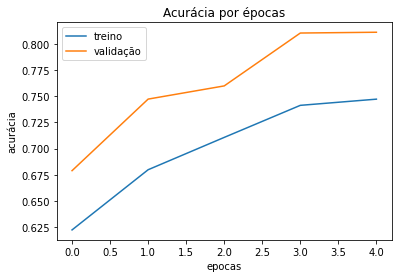

In [58]:
# plots dados do hitorico
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])

#informações extras
plt.title('Acurácia por épocas')
plt.xlabel('epocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])

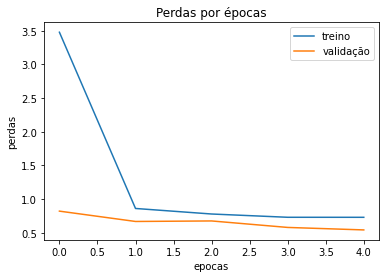

In [59]:
# plots dados do hitorico
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])

#informações extras
plt.title('Perdas por épocas')
plt.xlabel('epocas')
plt.ylabel('perdas')
plt.legend(['treino', 'validação'])

### Realizando Predição

In [60]:
testes = modelo.predict(imagens_teste)
print(f'Resultado teste {np.argmax(testes[0])}')
print(f'número da imagem de teste {identificacoes_teste[0]}')

testes_modelo_salvo = modelo_salvo.predict(imagens_teste)
print(f'Resultado teste modelo salvo {np.argmax(testes_modelo_salvo[0])}')
print(f'Número da imagem de teste modelo salvo {identificacoes_teste[0]}')

313/313 [==============================] - 1s 3ms/step
Resultado teste 9
número da imagem de teste 9
313/313 [==============================] - 1s 3ms/step
Resultado teste modelo salvo 9
Número da imagem de teste modelo salvo 9


In [61]:
testes = modelo.predict(imagens_teste)
print(f'Resultado teste {np.argmax(testes[2])}')
print(f'número da imagem de teste {identificacoes_teste[2]}')

testes_modelo_salvo = modelo_salvo.predict(imagens_teste)
print(f'Resultado teste modelo salvo {np.argmax(testes_modelo_salvo[2])}')
print(f'Número da imagem de teste modelo salvo {identificacoes_teste[2]}')

313/313 [==============================] - 1s 3ms/step
Resultado teste 1
número da imagem de teste 1
313/313 [==============================] - 1s 2ms/step
Resultado teste modelo salvo 1
Número da imagem de teste modelo salvo 1


In [62]:
testes = modelo.predict(imagens_teste)
print(f'Resultado teste {np.argmax(testes[4])}')
print(f'número da imagem de teste {identificacoes_teste[4]}')

testes_modelo_salvo = modelo_salvo.predict(imagens_teste)
print(f'Resultado teste modelo salvo {np.argmax(testes_modelo_salvo[4])}')
print(f'Número da imagem de teste modelo salvo {identificacoes_teste[4]}')

313/313 [==============================] - 1s 2ms/step
Resultado teste 6
número da imagem de teste 6
313/313 [==============================] - 1s 2ms/step
Resultado teste modelo salvo 6
Número da imagem de teste modelo salvo 6


In [63]:
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)
print(f'Perda do teste {perda_teste}')
print(f'Ácuracia do teste {acuracia_teste}')

313/313 [==============================] - 1s 3ms/step - loss: 0.5674 - accuracy: 0.8063
Perda do teste 0.5674223899841309
Ácuracia do teste 0.8062999844551086


# Estudo 02 - Retroporpagação ou Backpropagation

O backpropagation é indiscutivelmente o algoritmo mais importante na história das redes neurais. Sendo o algoritmo-chave que faz o treinamento de modelos profundos algo computacionalmente tratável. Para as `redes neurais modernas`, ele pode tornar o treinamento com gradiente descendente até dez milhões de vezes mais rápido, em relação a uma implementação ingênua. Essa é a diferença entre um modelo que leva algumas horas ou dias para treinar e e outro que poderia levar anos.

Fundamentalmente, backpropagation é uma técnica para calcular derivadas rapidamente. E é um truque essencial, não apenas em Deep Learning, mas em uma ampla variedade de situações de computação numérica.

## Sumário do Modelo

In [64]:
# NEW -------------
sumario_modelo = modelo.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 256)               200960    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [65]:
# NEW ------------
# pesos multiplicam para saber se o estamos proximos do resultado
pesos_camada_dense = modelo.layers[1].get_weights()[0]

# vieses mostram se estamos próximos ou longe do resultado esperado
vieses_camada_dense = modelo.layers[1].get_weights()[1]

## Realizando alterações nos pesos

In [66]:
pesos_camada_dense.shape

(784, 256)

In [67]:
# criando array zerada do mesmo tamanho do 'pesos_camada_dense'
pesos_camada_dense_zerados = np.zeros((784,256))

# comitando a array zerada
modelo.layers[1].set_weights(
    [pesos_camada_dense_zerados, vieses_camada_dense]
)

# copilando o modelo
modelo.compile(
    optimizer= 'adam',
    loss= 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
    )

# gravando resultado
historico = modelo.fit(imagens_treino, identificacoes_treino,
           epochs = 5, # realizar o treino 5 vezes
           validation_split = 0.2 # dados das perda e da acurácia validados
           )

Epoch 1/5
1500/1500 [==============================] - 9s 6ms/step - loss: 1.0580 - accuracy: 0.6398 - val_loss: 0.6619 - val_accuracy: 0.7834
Epoch 2/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.8629 - accuracy: 0.6887 - val_loss: 0.6676 - val_accuracy: 0.7635
Epoch 3/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.8126 - accuracy: 0.7045 - val_loss: 0.6638 - val_accuracy: 0.7643
Epoch 4/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.7955 - accuracy: 0.7120 - val_loss: 0.6107 - val_accuracy: 0.7738
Epoch 5/5
1500/1500 [==============================] - 7s 4ms/step - loss: 0.7827 - accuracy: 0.7207 - val_loss: 0.6564 - val_accuracy: 0.7522


In [68]:
# para visualizar o modelo
# modelo.layers[1].get_weights()

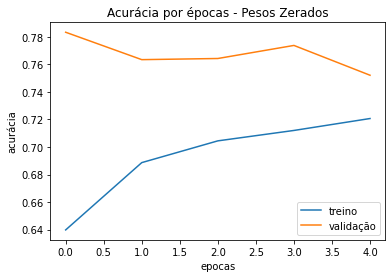

In [69]:
# plots dados do hitorico
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])

#informações extras
plt.title('Acurácia por épocas - Pesos Zerados')
plt.xlabel('epocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])

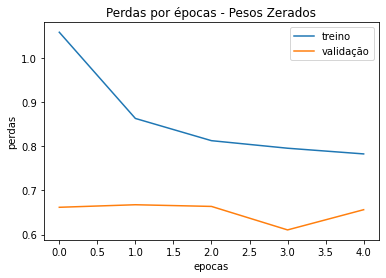

In [70]:
# plots dados do hitorico
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])

#informações extras
plt.title('Perdas por épocas - Pesos Zerados')
plt.xlabel('epocas')
plt.ylabel('perdas')
plt.legend(['treino', 'validação'])

In [71]:
# criando array aleatório para os pesos
pesos_camada_dense_aleatorios = np.random.rand(784,256)

# comitando a array aleatório
modelo.layers[1].set_weights(
    [pesos_camada_dense_aleatorios, vieses_camada_dense]
)

# copilando o modelo pesos aleatório
modelo.compile(
    optimizer= 'adam',
    loss= 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
    )

# gravando resultado
historico = modelo.fit(imagens_treino, identificacoes_treino,
           epochs = 5, # realizar o treino 5 vezes
           validation_split = 0.2 # dados das perda e da acurácia validados
           )

Epoch 1/5
1500/1500 [==============================] - 9s 6ms/step - loss: 10470.4805 - accuracy: 0.4122 - val_loss: 1989.3491 - val_accuracy: 0.6791
Epoch 2/5
1500/1500 [==============================] - 7s 5ms/step - loss: 2395.5076 - accuracy: 0.5990 - val_loss: 748.1124 - val_accuracy: 0.7028
Epoch 3/5
1500/1500 [==============================] - 8s 5ms/step - loss: 1065.1771 - accuracy: 0.6404 - val_loss: 593.9498 - val_accuracy: 0.6588
Epoch 4/5
1500/1500 [==============================] - 8s 6ms/step - loss: 561.7495 - accuracy: 0.6770 - val_loss: 242.9941 - val_accuracy: 0.7592
Epoch 5/5
1500/1500 [==============================] - 8s 5ms/step - loss: 294.5451 - accuracy: 0.7169 - val_loss: 231.7281 - val_accuracy: 0.7327


In [72]:
# para visualizar o modelo
# modelo.layers[1].get_weights()

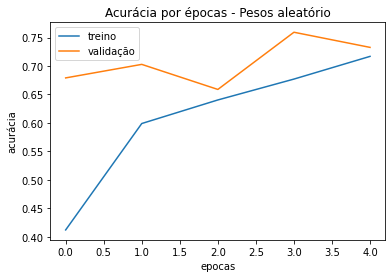

In [73]:
# plots dados do hitorico
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])

#informações extras
plt.title('Acurácia por épocas - Pesos aleatório')
plt.xlabel('epocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])

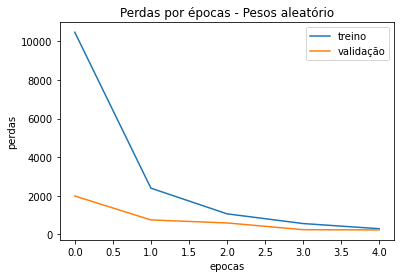

In [74]:
# plots dados do hitorico
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])

#informações extras
plt.title('Perdas por épocas - Pesos aleatório')
plt.xlabel('epocas')
plt.ylabel('perdas')
plt.legend(['treino', 'validação'])

In [75]:
modelo.get_config()

{'name': 'sequential_2',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 28, 28),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'flatten_2_input'}},
  {'class_name': 'Flatten',
   'config': {'name': 'flatten_2',
    'trainable': True,
    'batch_input_shape': (None, 28, 28),
    'dtype': 'float32',
    'data_format': 'channels_last'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_4',
    'trainable': True,
    'dtype': 'float32',
    'units': 256,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dropout',
   'config': {'name': 'dropout_2',
    'trainable': True,
    'dtype': 'float32',
  

### Realizando alterações nos vieses

In [76]:
vieses_camada_dense.shape

(256,)

#### Pesos e Vieses Zerados

In [77]:
# zerando os vieses de acordo com o tamanho do 'vieses_camada_dense'
vieses_camada_dense_zeradas = np.zeros((256,))

# comitando os vieses zerados
modelo.layers[1].set_weights(
    [pesos_camada_dense_zerados, vieses_camada_dense_zeradas]
)

# copilando o modelo
modelo.compile(
    optimizer= 'adam',
    loss= 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
    )

# gravando resultado
historico = modelo.fit(imagens_treino, identificacoes_treino,
           epochs = 5, # realizar o treino 5 vezes
           validation_split = 0.2 # dados das perda e da acurácia validados
           )

Epoch 1/5
1500/1500 [==============================] - 9s 6ms/step - loss: 2.8848 - accuracy: 0.1011 - val_loss: 2.5783 - val_accuracy: 0.0957
Epoch 2/5
1500/1500 [==============================] - 8s 5ms/step - loss: 2.4317 - accuracy: 0.1011 - val_loss: 2.3425 - val_accuracy: 0.0957
Epoch 3/5
1500/1500 [==============================] - 9s 6ms/step - loss: 2.3153 - accuracy: 0.1011 - val_loss: 2.3043 - val_accuracy: 0.0957
Epoch 4/5
1500/1500 [==============================] - 7s 5ms/step - loss: 2.3030 - accuracy: 0.0997 - val_loss: 2.3028 - val_accuracy: 0.0957
Epoch 5/5
1500/1500 [==============================] - 9s 6ms/step - loss: 2.3028 - accuracy: 0.1005 - val_loss: 2.3027 - val_accuracy: 0.0983


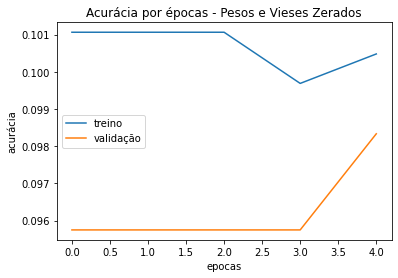

In [78]:
# plots dados do hitorico
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])

#informações extras
plt.title('Acurácia por épocas - Pesos e Vieses Zerados')
plt.xlabel('epocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])

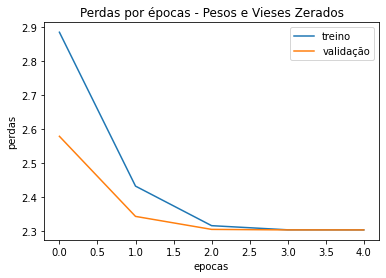

In [79]:
# plots dados do hitorico
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])

#informações extras
plt.title('Perdas por épocas - Pesos e Vieses Zerados')
plt.xlabel('epocas')
plt.ylabel('perdas')
plt.legend(['treino', 'validação'])

#### Pesos Aleatórios e Vieses Zerados

In [80]:
# zerando os vieses de acordo com o tamanho do 'vieses_camada_dense'
vieses_camada_dense_zeradas = np.zeros((256,))

# comitando os vieses zerados
modelo.layers[1].set_weights(
    [pesos_camada_dense_aleatorios, vieses_camada_dense_zeradas]
)

# copilando o modelo
modelo.compile(
    optimizer= 'adam',
    loss= 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
    )

# gravando resultado
historico = modelo.fit(imagens_treino, identificacoes_treino,
           epochs = 5, # realizar o treino 5 vezes
           validation_split = 0.2 # dados das perda e da acurácia validados
           )

Epoch 1/5
1500/1500 [==============================] - 9s 6ms/step - loss: 2199.6790 - accuracy: 0.3686 - val_loss: 881.3636 - val_accuracy: 0.5204
Epoch 2/5
1500/1500 [==============================] - 8s 5ms/step - loss: 823.0242 - accuracy: 0.5629 - val_loss: 378.4713 - val_accuracy: 0.6848
Epoch 3/5
1500/1500 [==============================] - 9s 6ms/step - loss: 476.8976 - accuracy: 0.6493 - val_loss: 170.2896 - val_accuracy: 0.7807
Epoch 4/5
1500/1500 [==============================] - 8s 5ms/step - loss: 222.1655 - accuracy: 0.7092 - val_loss: 143.3001 - val_accuracy: 0.7197
Epoch 5/5
1500/1500 [==============================] - 7s 5ms/step - loss: 82.5839 - accuracy: 0.7514 - val_loss: 56.0213 - val_accuracy: 0.7367


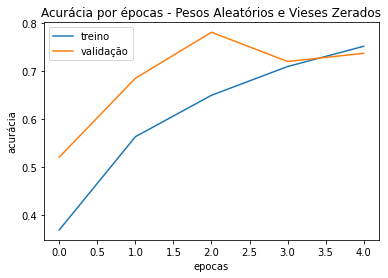

In [81]:
# plots dados do hitorico
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])

#informações extras
plt.title('Acurácia por épocas - Pesos Aleatórios e Vieses Zerados')
plt.xlabel('epocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])

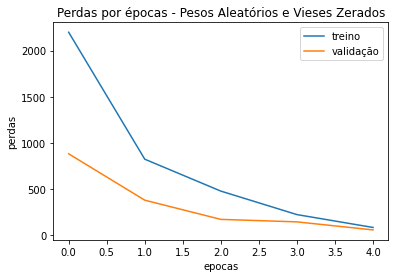

In [82]:
# plots dados do hitorico
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])

#informações extras
plt.title('Perdas por épocas - Pesos Aleatórios e Vieses Zerados')
plt.xlabel('epocas')
plt.ylabel('perdas')
plt.legend(['treino', 'validação'])

## Estudandos o Hiperparâmetros do ADAM 

In [85]:
# Estudo de hiperparâmetros
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape= (28,28)), 
    keras.layers.Dense(256, activation= 'relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation= 'softmax') 
])

## adpatando os hiperparâmetros do 'Adam'
adam = keras.optimizers.Adam( learning_rate= 0.002,  # taxa de aprendizado
                              )
## Retorno e/ou Parada
callbacks = [keras.callbacks.EarlyStopping( # métrica a ser monitorado
                                            monitor = 'val_loss',  
                                            # Número de épocas sem melhora depois do qual o treinamento será interrompido 
                                            patience = 1),         
             keras.callbacks.ModelCheckpoint(
                                            # nome arquivo
                                            filepath = 'melhor_modelo.hdf5',
                                            # métrica a ser monitorado
                                            monitor = 'val_loss',
                                            # modelo considerado o melhor
                                            save_best_only = True)
             ]

## copilando o modelo
modelo.compile(
    optimizer= adam,
    loss= 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
    )

# gravando resultado
historico = modelo.fit(
              imagens_treino, identificacoes_treino,
              epochs = 5,               # realizar o treino 5 vezes
              validation_split = 0.2,   # dados das perda e da acurácia validados
              batch_size = 100,          # quantidades de imagens passadas por vez
              callbacks = callbacks
            )

Epoch 1/5
480/480 [==============================] - 4s 7ms/step - loss: 5.5410 - accuracy: 0.6289 - val_loss: 0.7589 - val_accuracy: 0.7092
Epoch 2/5
480/480 [==============================] - 3s 7ms/step - loss: 0.8187 - accuracy: 0.6920 - val_loss: 0.6373 - val_accuracy: 0.7592
Epoch 3/5
480/480 [==============================] - 3s 7ms/step - loss: 0.7429 - accuracy: 0.7193 - val_loss: 0.6120 - val_accuracy: 0.7769
Epoch 4/5
480/480 [==============================] - 4s 7ms/step - loss: 0.7232 - accuracy: 0.7343 - val_loss: 0.5915 - val_accuracy: 0.8120
Epoch 5/5
480/480 [==============================] - 4s 7ms/step - loss: 0.6681 - accuracy: 0.7611 - val_loss: 0.6172 - val_accuracy: 0.7964
